# Assignment: SVD Preprocessing on MNIST with Logistic Regression

## Instructions:
In this assignment, you will apply **Singular Value Decomposition (SVD)** as a preprocessing step to the **MNIST dataset** and train a **logistic regression classifier**. You will compare the model performance and training time when using different levels of SVD for dimensionality reduction.

In this assignment, you will need to:
1. Load the MNIST dataset and normalize it.
2. Perform SVD and reduce the dimensions of the data.
3. Train a logistic regression model on the original and SVD-reduced data.
4. Measure and compare the training time and accuracy of the model with varying SVD components.
5. Plot the results and analyze how SVD impacts the performance and efficiency of the model.

***
Your tasks include:
1. Implement SVD algorithm. You are not allowed to directly use SVD implemented by other packages, but you may use functions in NumPy. (Part 2)
2. Explore the accuracy and time performance from different numbers of SVD components. (Part 4)
3. Visualize the accuracy, time performance and top 5 singular vectors in the dataset, analyze and explain which number of SVD component looks best to you? (Part 4,5&6) Hint: singular vectors should be reshaped to 28x28 images for visualization.
***
**Note that you may not import any other function or package.** Let's get started!


## Part 1: Load the MNIST dataset and preprocess the data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_openml
from sklearn.metrics import accuracy_score, classification_report

# Load MNIST dataset
print("Loading MNIST dataset...")
mnist = fetch_openml('mnist_784', version=1)
X = mnist.data
y = mnist.target

# Normalize the data
X = X / 255.0

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Loading MNIST dataset...


## Part 2: Implement SVD for Dimensionality Reduction

In [5]:
def apply_svd_custom(X_train, X_test, n_components):
    #computing the covariance matrix of X_train (X^T X)
    covariance_matrix = np.dot(X_train.T, X_train)
    #computing the eigenvalues and eigenvectors of the covariance matrix (for the Σ matrix)
    eigenvalues, eigenvectors = np.linalg.eigh(covariance_matrix)
    #sorting the eigenvalues (and corresponding eigenvectors) in descending order (again to work w SVD)
    sorted_indices = np.argsort(eigenvalues)[::-1]
    eigenvalues = eigenvalues[sorted_indices]
    eigenvectors = eigenvectors[:, sorted_indices]
    #filtering out small or negative eigenvalues to avoid invalid operations (was having a NaN error earlier)
    #replace negative or near-zero eigenvalues with a small positive number (for numerical stability)
    eigenvalues = np.clip(eigenvalues, 1e-10, None)
    #get the singular values as the square roots of the eigenvalues
    singular_values = np.sqrt(eigenvalues)

    #forming the matrix V (the eigenvectors of X^T X)
    Vt_train = eigenvectors.T
    #forming the matrix U (from X V Σ⁻¹)
    Sigma_inv = np.diag(1 / singular_values[:n_components])
    U_train = np.dot(X_train, np.dot(Vt_train[:n_components, :].T, Sigma_inv))
    #reducing dimensions by selecting top 'n_components' singular values
    Sigma_train_reduced = np.diag(singular_values[:n_components])
    #projecting training data onto reduced dimensional space
    X_train_reduced = np.dot(U_train, Sigma_train_reduced)

    #repeat the same for test data
    U_test = np.dot(X_test, np.dot(Vt_train[:n_components, :].T, Sigma_inv))
    X_test_reduced = np.dot(U_test, Sigma_train_reduced)

    return X_train_reduced, X_test_reduced, Vt_train  #also returning Vt train to get top singular vectors


## Part 3: Train Logistic Regression and Measure Performance

In [6]:
# Function to train logistic regression and track training time
def train_logistic_regression(X_train, y_train, X_test, y_test):
    model = LogisticRegression(max_iter=1000, solver='saga', random_state=42, multi_class='multinomial')

    # Measure training time
    start_time = time.time()
    model.fit(X_train, y_train)
    training_time = time.time() - start_time

    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)

    return accuracy, training_time


## Part 4: Experiment with Different Levels of SVD

Now, apply SVD with varying numbers of components and observe how the dimensionality reduction impacts the model's performance. Record both the accuracy and training time for each number of components.


In [7]:
svd_components = [784, 500, 300, 100, 50, 10]  # You need to decide what number to search...

# Store the results
results = []
Vt_train_list = None

print("Training models with different levels of SVD preprocessing...")
for n_components in svd_components:
    print(f"Applying custom SVD with {n_components} components...")

    # Apply SVD to the training and test sets
    # Call apply_svd_custom() here...
    X_train_svd, X_test_svd, Vt_train = apply_svd_custom(X_train, X_test, n_components)
    if n_components == 784:
        Vt_train_list = Vt_train

    # Train the logistic regression model and get accuracy and training time
    accuracy, training_time = train_logistic_regression(X_train_svd, y_train, X_test_svd, y_test)

    results.append((n_components, accuracy, training_time))

    print(f"SVD components: {n_components}, Accuracy: {accuracy:.4f}, Training time: {training_time:.4f} seconds")


Training models with different levels of SVD preprocessing...
Applying custom SVD with 784 components...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 784, Accuracy: 0.9209, Training time: 713.0049 seconds
Applying custom SVD with 500 components...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 500, Accuracy: 0.9205, Training time: 430.5447 seconds
Applying custom SVD with 300 components...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 300, Accuracy: 0.9205, Training time: 201.0539 seconds
Applying custom SVD with 100 components...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 100, Accuracy: 0.9181, Training time: 44.9563 seconds
Applying custom SVD with 50 components...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 50, Accuracy: 0.9085, Training time: 11.6825 seconds
Applying custom SVD with 10 components...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 10, Accuracy: 0.8020, Training time: 0.8513 seconds


## Part 5: Visualize and Analyze the Results

Finally, plot the accuracy, training time as a function of the number of SVD components, and top 5 singular vectors. This will help you understand the trade-off between dimensionality reduction, accuracy, and model training time, and how SVD generally works. Hint: singular vectors should be reshaped to 28x28 images for visualization.


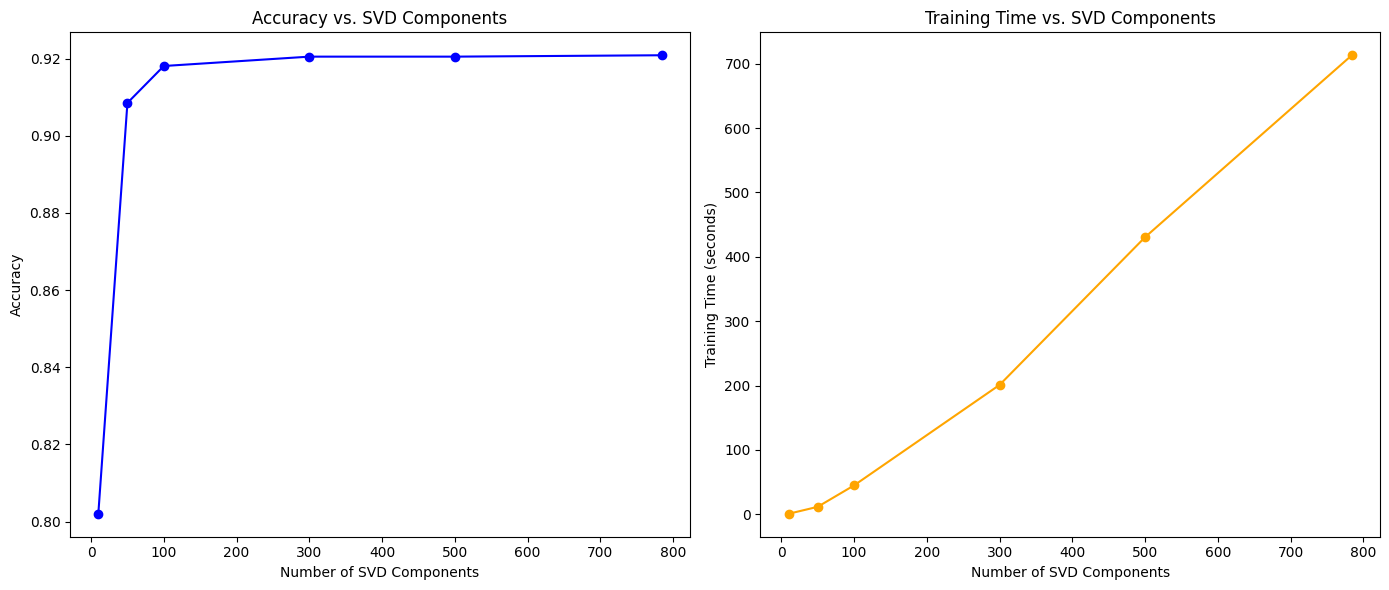

<ipython-input-9-316284cf1bc1>:31: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 5, i+1)


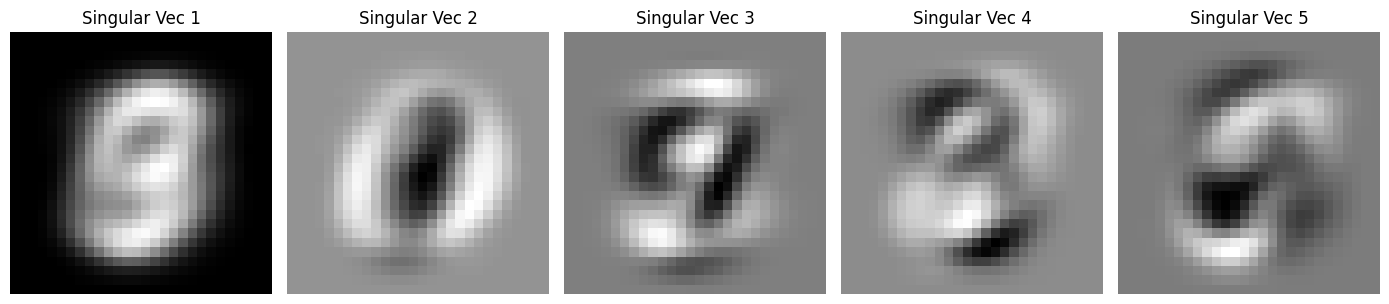

In [9]:
def visualize_and_analyze_results(results, Vt_train):
    components = [r[0] for r in results]
    accuracies = [r[1] for r in results]
    times = [r[2] for r in results]

    plt.figure(figsize=(14,6))

    # Subplot 1: Accuracy vs. SVD Components
    plt.subplot(1, 2, 1)
    plt.plot(components, accuracies, marker='o', color='blue')
    plt.title('Accuracy vs. SVD Components')
    plt.xlabel('Number of SVD Components')
    plt.ylabel('Accuracy')

    # Subplot 2: Training Time vs. SVD Components
    plt.subplot(1, 2, 2)
    plt.plot(components, times, marker='o', color='orange')
    plt.title('Training Time vs. SVD Components')
    plt.xlabel('Number of SVD Components')
    plt.ylabel('Training Time (seconds)')

    plt.tight_layout()
    plt.show()

    # Figure 2: Figure for Singular Vectors to avoid subplot conflicts
    plt.figure(figsize=(14, 4))
    plt.title('Top 5 Singular Vectors')

    for i in range(5):
        singular_vector = Vt_train[i].reshape(28, 28)
        plt.subplot(1, 5, i+1)
        plt.imshow(singular_vector, cmap='gray')
        plt.axis('off')
        plt.title(f'Singular Vec {i+1}')

    plt.tight_layout()
    plt.show()

# Call the function to visualize
visualize_and_analyze_results(results, Vt_train_list)


## Part 6: Analyze / Conclusion

YOUR ANSWER: Given the plot above with the displayed plots for each singular vector and the accuracy, time performance, and top 5 singular vectors in the dataset, the number of SVD components that looks best to me is 100 components. This is because, as we can see in the first plot, at around 100 components we start to level off in how much the accuracy increases and the accuracy is generally around how much it would be with much more components (300, 500, 784, etc.). Next, if we look at the second plot, we can also see that 100 components takes a very short period of time to train on and is close to how long it takes low number of components that have lower accuracies. Lastly, if we look at the top 5 singular values in the dataset, we can see that they are some kind of numbers? (maybe 0-9) So that would explain why 100 components would be ok to train on since there aren't that many singular values. In conclusion, because 100 SVD components keeps a high accuracy while also maintaining a low training time and it also makes sense that it would be able to adequately capture the components accurately that's why I say that 100 components is best.